### data import

In [56]:
import pandas as pd
import numpy as np

df_iphone = pd.read_csv("data/iphone_kmc.csv")
summary_iphone = df_iphone.groupby(["cluster", "price_tier"]).agg({
    "price.value": ['count', 'mean', 'min', "median", 'max']})
print(summary_iphone)
median_iphone = df_iphone["price.value"].median()
df_iphone["is_high_price"] = df_iphone["price.value"] > median_iphone

df_soccer = pd.read_csv("data/soccer_kmc.csv")
summary_soccer = df_soccer.groupby(["cluster", "price_tier"]).agg({
    "price.value": ['count', 'mean', 'min', "median", 'max']})
print(summary_soccer)
median_soccer = df_soccer["price.value"].median()
df_soccer["is_high_price"] = df_soccer["price.value"] > median_soccer

df_microwaves = pd.read_csv("data/microwave_kmc.csv")
summary_microwave = df_microwaves.groupby(["cluster", "price_tier"]).agg({
    "price_value": ['count', 'mean', 'min', "median", 'max']})
print(summary_microwave)
median_microwave = df_microwaves["price_value"].median()
df_microwaves["is_high_price"] = df_microwaves["price_value"] > median_microwave

df_lego = pd.read_csv("data/lego_kmc.csv")
summary_lego = df_lego.groupby(["cluster", "price_tier"]).agg({
    "price_value": ['count', 'mean', 'min', "median", 'max']})
print(summary_lego)
median_lego = df_lego["price_value"].median()
df_lego["is_high_price"] = df_lego["price_value"] > median_lego

                   price.value                                      
                         count        mean     min   median      max
cluster price_tier                                                  
0       medium             166  536.551687  446.99  537.975   650.00
1       high                96  848.694583  650.00  776.995  1449.99
2       low                124  352.649919  215.00  349.915   439.99
                   price.value                                 
                         count       mean    min median     max
cluster price_tier                                             
0       high               250  83.140840  60.00  73.90  299.99
1       low                336  27.519554   5.94  28.98   38.50
2       medium             414  49.747512  38.88  49.99   60.00
                   price_value                                     
                         count        mean     min  median      max
cluster price_tier                                                

### iPhone

#### NB

In [57]:
#df_iphone.info()

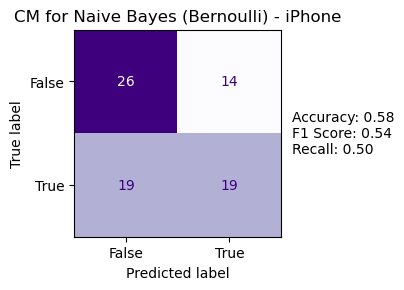

In [58]:
binary_features_iphone = ["topRatedBuyingExperience", "priorityListing", "discount_flag",
                          "unlocked"]
response = "is_high_price"

from sklearn.model_selection import train_test_split

X_train_iphone, X_test_iphone, y_train_iphone, y_test_iphone = train_test_split(df_iphone[binary_features_iphone], df_iphone[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.naive_bayes import BernoulliNB
classifier_bern_iphone = BernoulliNB()
classifier_bern_iphone.fit(X_train_iphone, y_train_iphone)
preds_bern_iphone = classifier_bern_iphone.predict(X_test_iphone)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_iphone, preds_bern_iphone)
f1 = f1_score(y_test_iphone, preds_bern_iphone)#, average="weighted")
recall = recall_score(y_test_iphone, preds_bern_iphone)#, average="weighted")
cm_iphone = confusion_matrix(y_test_iphone, preds_bern_iphone)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=classifier_bern_iphone.classes_)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('CM for Naive Bayes (Bernoulli) - iPhone')
#fig.text(0.5, 0.75, 'High Price True/False', ha='center', fontsize=10, color='gray')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.subplots_adjust(top=0.8)
#plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("images/3/cm_nbb_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

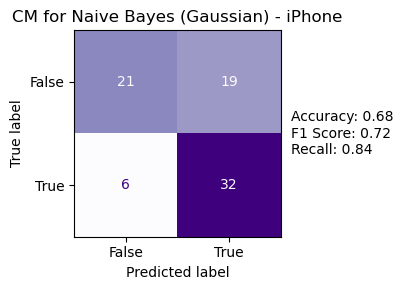

In [59]:
num_features_iphone = ["seller.feedbackPercentage", "seller.feedbackScore", "days_listed",  "seller_item_count",
"model_number", "additional_image_count", "title_length"]
response = "is_high_price"

from sklearn.model_selection import train_test_split
X_train_iphone, X_test_iphone, y_train_iphone, y_test_iphone = train_test_split(df_iphone[num_features_iphone], df_iphone[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_iphone = sc.fit_transform(X_train_iphone)
X_test_scaled_iphone = sc.transform(X_test_iphone)

from sklearn.naive_bayes import GaussianNB
classifier_gauss_iphone = GaussianNB()
classifier_gauss_iphone.fit(X_train_scaled_iphone, y_train_iphone)
preds_gauss_iphone = classifier_gauss_iphone.predict(X_test_scaled_iphone)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_iphone, preds_gauss_iphone)
f1 = f1_score(y_test_iphone, preds_gauss_iphone)#, average="weighted")
recall = recall_score(y_test_iphone, preds_gauss_iphone)#, average="weighted")
cm_iphone = confusion_matrix(y_test_iphone, preds_gauss_iphone)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=classifier_gauss_iphone.classes_)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('CM for Naive Bayes (Gaussian) - iPhone')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbg_iphone.png", dpi=300, bbox_inches='tight')
plt.show()


Accuracy: 0.717948717948718
              precision    recall  f1-score   support

       False       0.75      0.68      0.71        40
        True       0.69      0.76      0.72        38

    accuracy                           0.72        78
   macro avg       0.72      0.72      0.72        78
weighted avg       0.72      0.72      0.72        78



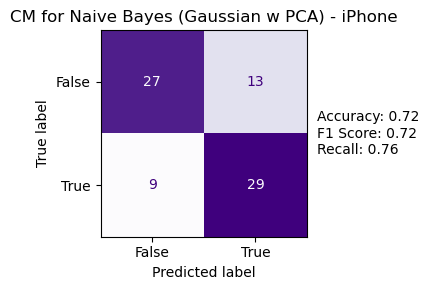

Accuracy: 0.717948717948718 

F1 0.725


In [60]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

pca = PCA(n_components=5)
X_train_iphone_pca = pca.fit_transform(X_train_scaled_iphone)
X_test_iphone_pca = pca.transform(X_test_scaled_iphone)

classifier_gauss = GaussianNB()
classifier_gauss.fit(X_train_iphone_pca, y_train_iphone)
preds = classifier_gauss.predict(X_test_iphone_pca)

print("Accuracy:", accuracy_score(y_test_iphone, preds))
print(classification_report(y_test_iphone, preds))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_iphone, preds)
f1 = f1_score(y_test_iphone, preds)#, average="weighted")
recall = recall_score(y_test_iphone, preds)#, average="weighted")
cm_iphone = confusion_matrix(y_test_iphone, preds)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=classifier_gauss_iphone.classes_)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('CM for Naive Bayes (Gaussian w PCA) - iPhone')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbg_pca_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

print("Accuracy:", accuracy, "\n")
print("F1", f1)

#### KNN

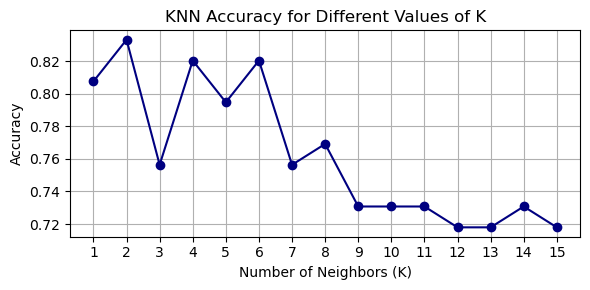

In [61]:
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 16)  # Try K from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_iphone, y_train_iphone)
    preds = knn.predict(X_test_scaled_iphone)
    acc = accuracy_score(y_test_iphone, preds)
    accuracies.append(acc)

plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='navy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/3/knn_plot_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

Accuracy: 0.8333333333333334
F1 Score: 0.8266666666666667
Recall: 0.8157894736842105
              precision    recall  f1-score   support

       False       0.83      0.85      0.84        40
        True       0.84      0.82      0.83        38

    accuracy                           0.83        78
   macro avg       0.83      0.83      0.83        78
weighted avg       0.83      0.83      0.83        78



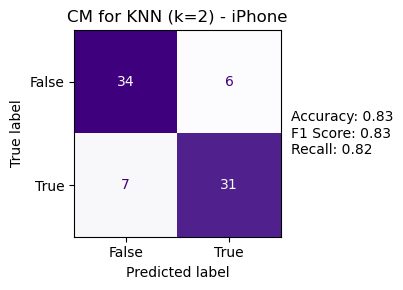

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

knn_iphone = KNeighborsClassifier(n_neighbors=2)  
knn_iphone.fit(X_train_scaled_iphone, y_train_iphone)
preds_knn_iphone = knn_iphone.predict(X_test_scaled_iphone)

#have to run numerical features train/test split from above
print("Accuracy:", accuracy_score(y_test_iphone, preds_knn_iphone))
print("F1 Score:", f1_score(y_test_iphone, preds_knn_iphone))
print("Recall:", recall_score(y_test_iphone, preds_knn_iphone))
print(classification_report(y_test_iphone, preds_knn_iphone))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test_iphone, preds_knn_iphone)
f1 = f1_score(y_test_iphone, preds_knn_iphone)#, average="weighted")
recall = recall_score(y_test_iphone, preds_knn_iphone)#, average="weighted")
cm_iphone = confusion_matrix(y_test_iphone, preds_knn_iphone)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=knn_iphone.classes_)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('CM for KNN (k=2) - iPhone')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_knn_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

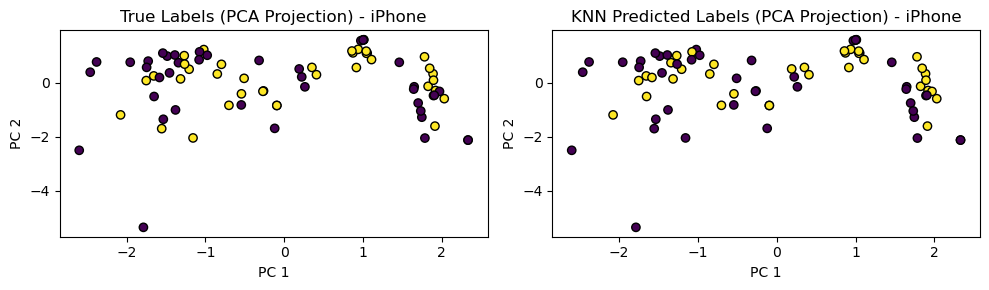

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fit PCA on test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled_iphone)

y_true_numeric = pd.factorize(y_test_iphone.squeeze())[0]
y_pred_numeric = pd.factorize(pd.Series(preds_knn_iphone).squeeze())[0]

# True labels
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_true_numeric, cmap='viridis', edgecolor='k')
plt.title("True Labels (PCA Projection) - iPhone")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_numeric, cmap='viridis', edgecolor='k')
plt.title("KNN Predicted Labels (PCA Projection) - iPhone")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.savefig("images/3/knn_pca_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

In [64]:
num_features_iphone = ["seller.feedbackPercentage", "seller.feedbackScore", "days_listed",  "seller_item_count",
"model_number", "additional_image_count", "title_length"]
response = "cluster"

from sklearn.model_selection import train_test_split
X_train_iphone, X_test_iphone, y_train_iphone, y_test_iphone = train_test_split(df_iphone[num_features_iphone], df_iphone[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_iphone = sc.fit_transform(X_train_iphone)
X_test_scaled_iphone = sc.transform(X_test_iphone)

def custom_weight(distances):
    return 1 / (distances + 1e-5)

knn_iphone2 = KNeighborsClassifier(n_neighbors=2, weights=custom_weight)
knn_iphone2.fit(X_train_scaled_iphone, y_train_iphone)
preds_knn_iphone2 = knn_iphone2.predict(X_test_scaled_iphone)

#have to run numerical features train/test split from above
print("Accuracy:", accuracy_score(y_test_iphone, preds_knn_iphone2))
print("F1 Score:", f1_score(y_test_iphone, preds_knn_iphone2, average="weighted"))
print("Recall:", recall_score(y_test_iphone, preds_knn_iphone2, average="weighted"))
print(classification_report(y_test_iphone, preds_knn_iphone2))


Accuracy: 0.7948717948717948
F1 Score: 0.7951933240795659
Recall: 0.7948717948717948
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        39
           1       0.79      0.86      0.83        22
           2       0.70      0.82      0.76        17

    accuracy                           0.79        78
   macro avg       0.78      0.81      0.79        78
weighted avg       0.80      0.79      0.80        78



#### KNN with 3 classes

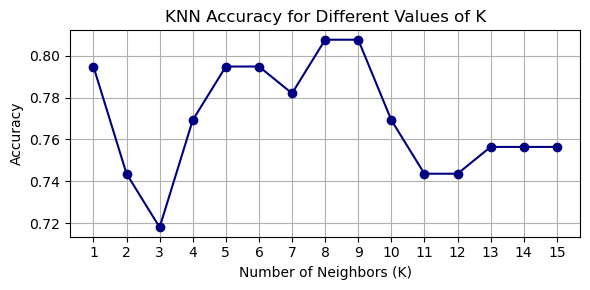

In [65]:
tier_order = ["low", "medium", "high"]
num_features_iphone = ["seller.feedbackPercentage", "seller.feedbackScore", "days_listed",  "seller_item_count",
 "additional_image_count", "title_length", "model_number"]
response = "price_tier"

from sklearn.model_selection import train_test_split
X_train_iphone, X_test_iphone, y_train_iphone, y_test_iphone = train_test_split(df_iphone[num_features_iphone], df_iphone[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_iphone = sc.fit_transform(X_train_iphone)
X_test_scaled_iphone = sc.transform(X_test_iphone)

from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 16)  # Try K from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_iphone, y_train_iphone)
    preds = knn.predict(X_test_scaled_iphone)
    acc = accuracy_score(y_test_iphone, preds)
    accuracies.append(acc)

plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='navy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/3/knn_plot_iphone2.png", dpi=300, bbox_inches='tight')
plt.show()

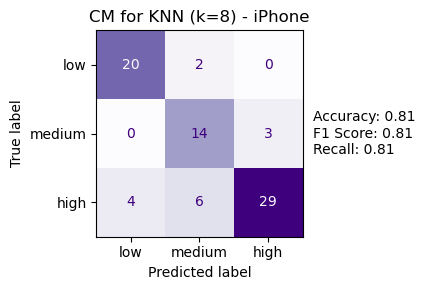

In [66]:
knn_iphone = KNeighborsClassifier(n_neighbors=8)  
knn_iphone.fit(X_train_scaled_iphone, y_train_iphone)
preds_knn_iphone = knn_iphone.predict(X_test_scaled_iphone)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_iphone, preds_knn_iphone)
f1 = f1_score(y_test_iphone, preds_knn_iphone, average="weighted")
recall = recall_score(y_test_iphone, preds_knn_iphone, average="weighted")
cm_iphone = confusion_matrix(y_test_iphone, preds_knn_iphone)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=tier_order)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('CM for KNN (k=8) - iPhone')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_knn_iphone3.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

Label mapping: {'low': 0, 'high': 1, 'medium': 2}


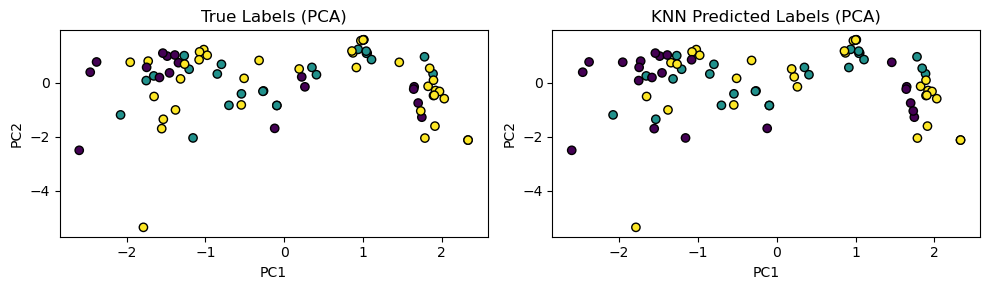

In [67]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

y_test_flat = pd.Series(y_test_iphone).reset_index(drop=True)
preds_flat  = pd.Series(preds_knn_iphone).reset_index(drop=True)
X = np.asarray(X_test_scaled_iphone)

y_true_codes, uniques = pd.factorize(y_test_flat)
label_map = {lab: i for i, lab in enumerate(uniques)}
y_pred_codes = preds_flat.map(label_map).fillna(-1).astype(int).to_numpy()

print("Label mapping:", label_map)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# True labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1],
                c=y_true_codes, cmap='viridis', edgecolor='k')
axes[0].set(title='True Labels (PCA)', xlabel='PC1', ylabel='PC2')

# Predicted labels
axes[1].scatter(X_pca[:, 0], X_pca[:, 1],
                c=y_pred_codes, cmap='viridis', edgecolor='k')
axes[1].set(title='KNN Predicted Labels (PCA)', xlabel='PC1', ylabel='PC2')

plt.tight_layout()
plt.savefig("images/3/knn_pca_iphone2.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

#### Weight balance KNN

Accuracy: 0.9230769230769231
F1 Score: 0.9267930137495355
Recall: 0.9230769230769231
              precision    recall  f1-score   support

       False       0.60      0.75      0.67         8
        True       0.97      0.94      0.96        70

    accuracy                           0.92        78
   macro avg       0.79      0.85      0.81        78
weighted avg       0.93      0.92      0.93        78



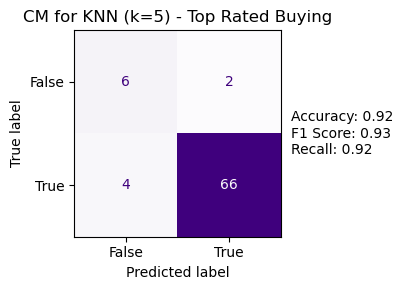

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Features and target
num_features_iphone = ["seller.feedbackPercentage", "seller.feedbackScore", "days_listed",  "seller_item_count",
                      "model_number", "additional_image_count", "title_length", "price.value"]
response = "topRatedBuyingExperience"

# Split train/test
X_train_iphone, X_test_iphone, y_train_iphone, y_test_iphone = train_test_split(
    df_iphone[num_features_iphone], df_iphone[response],
    test_size=0.20, random_state=1216)

# Combine X and y for upsampling
train_df = pd.concat([X_train_iphone, y_train_iphone], axis=1)

# Separate majority and minority classes
majority_class = train_df[train_df[response] == True]
minority_class = train_df[train_df[response] == False]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combine majority and upsampled minority, then shuffle
train_upsampled = pd.concat([majority_class, minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Split back to X and y
X_train_upsampled = train_upsampled[num_features_iphone]
y_train_upsampled = train_upsampled[response]

# Scale features
sc = StandardScaler()
X_train_scaled_iphone = sc.fit_transform(X_train_upsampled)
X_test_scaled_iphone = sc.transform(X_test_iphone)

# Define custom weight function for KNN
def custom_weight(distances):
    return 1 / (distances + 1e-5)

# Train KNN with weighted distances
knn_iphone2 = KNeighborsClassifier(n_neighbors=2, weights=custom_weight)
knn_iphone2.fit(X_train_scaled_iphone, y_train_upsampled)

# Predict on test set
preds_knn_iphone2 = knn_iphone2.predict(X_test_scaled_iphone)

# Evaluation
accuracy = accuracy_score(y_test_iphone, preds_knn_iphone2)
f1 = f1_score(y_test_iphone, preds_knn_iphone2, average="weighted")
recall = recall_score(y_test_iphone, preds_knn_iphone2, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print(classification_report(y_test_iphone, preds_knn_iphone2))

# Confusion matrix plot
cm_iphone = confusion_matrix(y_test_iphone, preds_knn_iphone2)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=knn_iphone2.classes_)
disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('CM for KNN (k=5) - Top Rated Buying')

textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.savefig("images/3/cm_knn_iphone2.png", dpi=300, bbox_inches='tight')
plt.show()



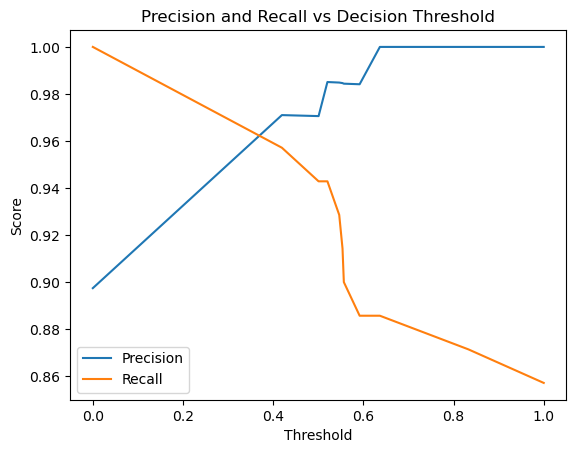

In [69]:
from sklearn.metrics import precision_recall_curve

probs = knn_iphone2.predict_proba(X_test_scaled_iphone)[:, 1]  # probability of class True
precision, recall, thresholds = precision_recall_curve(y_test_iphone, probs)

import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Decision Threshold')
plt.legend()
plt.show()



In [70]:
summary = df_iphone.groupby(["topRatedBuyingExperience"])["itemId"].count()
summary


topRatedBuyingExperience
False     76
True     310
Name: itemId, dtype: int64

### Soccer

In [71]:
#df_soccer.info()

#### NB

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


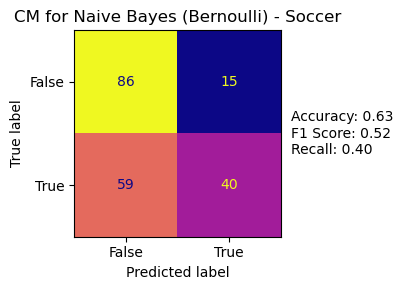

In [72]:
binary_features_soccer = ["topRatedBuyingExperience", "priorityListing", "discount_flag",
                          "top_club", "top_country", "Messi"]
response = ["is_high_price"]

from sklearn.model_selection import train_test_split

X_train_soccer, X_test_soccer, y_train_soccer, y_test_soccer = train_test_split(df_soccer[binary_features_soccer], df_soccer[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.naive_bayes import BernoulliNB
classifier_bern_soccer = BernoulliNB()
classifier_bern_soccer.fit(X_train_soccer, y_train_soccer)
preds_bern_soccer = classifier_bern_soccer.predict(X_test_soccer)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_soccer, preds_bern_soccer)
f1 = f1_score(y_test_soccer, preds_bern_soccer)#, average="weighted")
recall = recall_score(y_test_soccer, preds_bern_soccer)#, average="weighted")
cm_soccer = confusion_matrix(y_test_soccer, preds_bern_soccer)
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=classifier_bern_soccer.classes_)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('CM for Naive Bayes (Bernoulli) - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbb_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

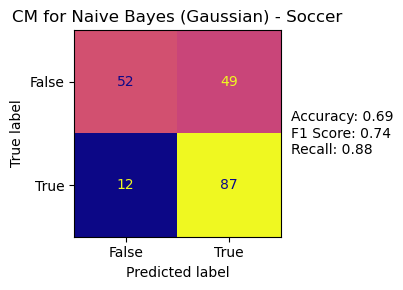

Accuracy: 0.695 

F1 0.7404255319148936


In [73]:
num_features_soccer = ["seller.feedbackPercentage", "seller.feedbackScore", "days_listed",  "seller_item_count",
                        "additional_image_count", "title_length"]
response = "is_high_price"

from sklearn.model_selection import train_test_split
X_train_soccer, X_test_soccer, y_train_soccer, y_test_soccer = train_test_split(df_soccer[num_features_soccer], df_soccer[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_soccer = sc.fit_transform(X_train_soccer)
X_test_scaled_soccer = sc.transform(X_test_soccer)

from sklearn.naive_bayes import GaussianNB
classifier_gauss_soccer = GaussianNB()
classifier_gauss_soccer.fit(X_train_scaled_soccer, y_train_soccer)
preds_gauss_soccer = classifier_gauss_soccer.predict(X_test_scaled_soccer)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_soccer, preds_gauss_soccer)
f1 = f1_score(y_test_soccer, preds_gauss_soccer)#, average="weighted")
recall = recall_score(y_test_soccer, preds_gauss_soccer)#, average="weighted")
cm_soccer = confusion_matrix(y_test_soccer, preds_gauss_soccer)
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=classifier_gauss_soccer.classes_)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('CM for Naive Bayes (Gaussian) - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbg_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

print("Accuracy:", accuracy, "\n")
print("F1", f1)

#### KNN

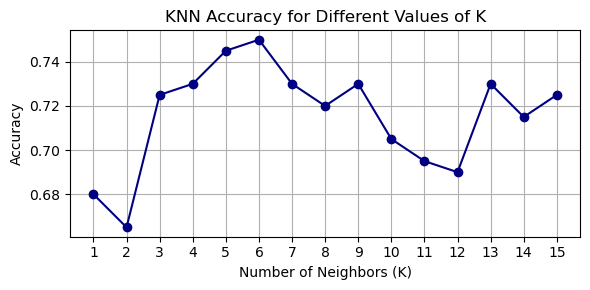

In [74]:
k_values = range(1, 16)  # Try K from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_soccer, y_train_soccer)
    preds = knn.predict(X_test_scaled_soccer)
    acc = accuracy_score(y_test_soccer, preds)
    accuracies.append(acc)

plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='navy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/3/knn_plot_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

Accuracy: 0.75
              precision    recall  f1-score   support

       False       0.73      0.79      0.76       101
        True       0.77      0.71      0.74        99

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

Accuracy: 0.75 

F1 0.7368421052631579


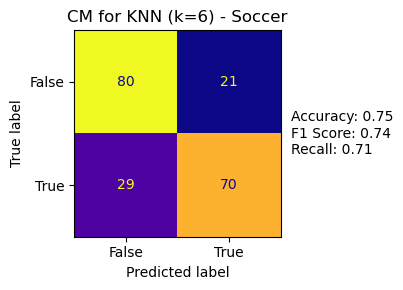

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_soccer = KNeighborsClassifier(n_neighbors=6)  
knn_soccer.fit(X_train_scaled_soccer, y_train_soccer)
preds_knn_soccer = knn_soccer.predict(X_test_scaled_soccer)

#have to run numerical features train/test split from above
print("Accuracy:", accuracy_score(y_test_soccer, preds_knn_soccer))
print(classification_report(y_test_soccer, preds_knn_soccer))

accuracy = accuracy_score(y_test_soccer, preds_knn_soccer)
f1 = f1_score(y_test_soccer, preds_knn_soccer)#, average="weighted")
print("Accuracy:", accuracy, "\n")
print("F1", f1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test_soccer, preds_knn_soccer)
f1 = f1_score(y_test_soccer, preds_knn_soccer)#, average="weighted")
recall = recall_score(y_test_soccer, preds_knn_soccer)#, average="weighted")
cm_soccer = confusion_matrix(y_test_soccer, preds_knn_soccer)
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=knn_soccer.classes_)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('CM for KNN (k=6) - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_knn_soccer.png", dpi=300, bbox_inches='tight')
plt.show()



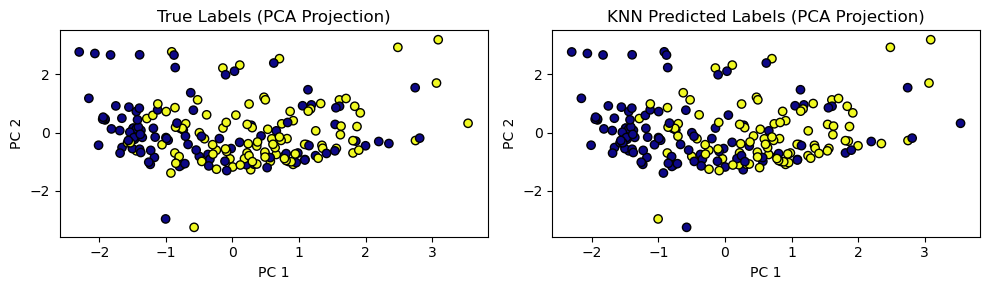

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fit PCA on test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled_soccer)

y_true_numeric = pd.factorize(y_test_soccer.squeeze())[0]
y_pred_numeric = pd.factorize(pd.Series(preds_knn_soccer).squeeze())[0]

# True labels
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_true_numeric, cmap='plasma', edgecolor='k')
plt.title("True Labels (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_numeric, cmap='plasma', edgecolor='k')
plt.title("KNN Predicted Labels (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.savefig("images/3/knn_pca_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

#### KNN w 3 classes

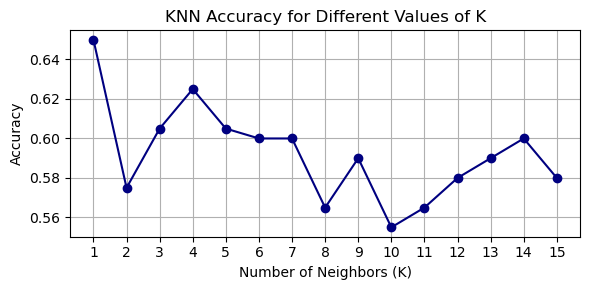

In [77]:
tier_order = ["low", "medium", "high"]
num_features_soccer = ["seller.feedbackPercentage", "seller.feedbackScore", "days_listed",  "seller_item_count",
                       "additional_image_count", "title_length"]
response = "price_tier"

from sklearn.model_selection import train_test_split
X_train_soccer, X_test_soccer, y_train_soccer, y_test_soccer = train_test_split(df_soccer[num_features_soccer], df_soccer[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_soccer = sc.fit_transform(X_train_soccer)
X_test_scaled_soccer = sc.transform(X_test_soccer)

from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 16)  # Try K from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_soccer, y_train_soccer)
    preds = knn.predict(X_test_scaled_soccer)
    acc = accuracy_score(y_test_soccer, preds)
    accuracies.append(acc)

plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='navy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/3/knn_plot_soccer2.png", dpi=300, bbox_inches='tight')
plt.show()

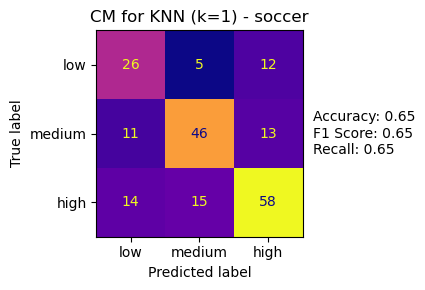

In [78]:
knn_soccer = KNeighborsClassifier(n_neighbors=1)  
knn_soccer.fit(X_train_scaled_soccer, y_train_soccer)
preds_knn_soccer = knn_soccer.predict(X_test_scaled_soccer)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_soccer, preds_knn_soccer)
f1 = f1_score(y_test_soccer, preds_knn_soccer, average="weighted")
recall = recall_score(y_test_soccer, preds_knn_soccer, average="weighted")
cm_soccer = confusion_matrix(y_test_soccer, preds_knn_soccer)
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=tier_order)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('CM for KNN (k=1) - soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_knn_soccer3.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

Label mapping: {'low': 0, 'medium': 1, 'high': 2}


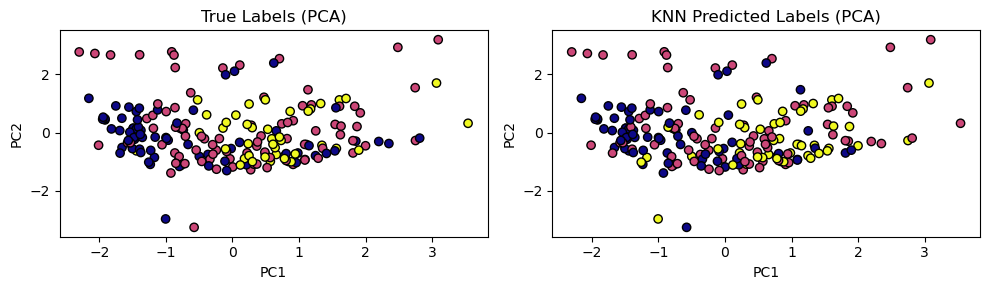

In [79]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

y_test_flat = pd.Series(y_test_soccer).reset_index(drop=True)
preds_flat  = pd.Series(preds_knn_soccer).reset_index(drop=True)
X = np.asarray(X_test_scaled_soccer)

y_true_codes, uniques = pd.factorize(y_test_flat)
label_map = {lab: i for i, lab in enumerate(uniques)}
y_pred_codes = preds_flat.map(label_map).fillna(-1).astype(int).to_numpy()

print("Label mapping:", label_map)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# True labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1],
                c=y_true_codes, cmap='plasma', edgecolor='k')
axes[0].set(title='True Labels (PCA)', xlabel='PC1', ylabel='PC2')

# Predicted labels
axes[1].scatter(X_pca[:, 0], X_pca[:, 1],
                c=y_pred_codes, cmap='plasma', edgecolor='k')
axes[1].set(title='KNN Predicted Labels (PCA)', xlabel='PC1', ylabel='PC2')

plt.tight_layout()
plt.savefig("images/3/knn_pca_soccer2.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

### Microwaves

In [80]:
#df_microwaves.info()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


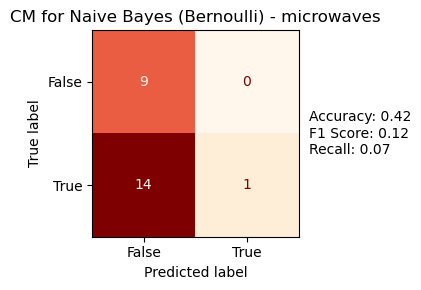

In [81]:
binary_features_microwaves = ["is_prime", "sponsored", "is_small_business", "has_coupon", "commercial"]
response = ["is_high_price"]

from sklearn.model_selection import train_test_split

X_train_microwaves, X_test_microwaves, y_train_microwaves, y_test_microwaves = train_test_split(df_microwaves[binary_features_microwaves], df_microwaves[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.naive_bayes import BernoulliNB
classifier_bern_microwaves = BernoulliNB()
classifier_bern_microwaves.fit(X_train_microwaves, y_train_microwaves)
preds_bern_microwaves = classifier_bern_microwaves.predict(X_test_microwaves)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_microwaves, preds_bern_microwaves)
f1 = f1_score(y_test_microwaves, preds_bern_microwaves)#, average="weighted")
recall = recall_score(y_test_microwaves, preds_bern_microwaves)#, average="weighted")
cm_microwaves = confusion_matrix(y_test_microwaves, preds_bern_microwaves)
fig, ax = plt.subplots(figsize=(5,3))
disp_microwaves = ConfusionMatrixDisplay(confusion_matrix=cm_microwaves, display_labels=classifier_bern_microwaves.classes_)
disp_microwaves = disp_microwaves.plot(ax=ax, cmap="OrRd", colorbar=False)
disp_microwaves.ax_.set_title('CM for Naive Bayes (Bernoulli) - microwaves')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbb_microwaves.png", dpi=300, bbox_inches='tight')
plt.show()

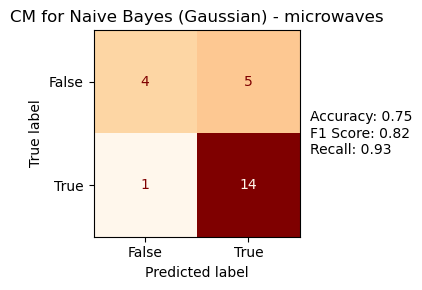

In [82]:
num_features_microwaves = ["rating", "ratings_total", "recent_sales_num", "discount$", "discount%"]
df_microwaves[num_features_microwaves] = df_microwaves[num_features_microwaves].fillna(0)

response = "is_high_price"

from sklearn.model_selection import train_test_split
X_train_microwaves, X_test_microwaves, y_train_microwaves, y_test_microwaves = train_test_split(df_microwaves[num_features_microwaves], df_microwaves[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_microwaves = sc.fit_transform(X_train_microwaves)
X_test_scaled_microwaves = sc.transform(X_test_microwaves)

from sklearn.naive_bayes import GaussianNB
classifier_gauss_microwaves = GaussianNB()
classifier_gauss_microwaves.fit(X_train_scaled_microwaves, y_train_microwaves)
preds_gauss_microwaves = classifier_gauss_microwaves.predict(X_test_scaled_microwaves)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_microwaves, preds_gauss_microwaves)
f1 = f1_score(y_test_microwaves, preds_gauss_microwaves)#, average="weighted")
recall = recall_score(y_test_microwaves, preds_gauss_microwaves)#, average="weighted")
cm_microwaves = confusion_matrix(y_test_microwaves, preds_gauss_microwaves)
fig, ax = plt.subplots(figsize=(5,3))
disp_microwaves = ConfusionMatrixDisplay(confusion_matrix=cm_microwaves, display_labels=classifier_gauss_microwaves.classes_)
disp_microwaves = disp_microwaves.plot(ax=ax, cmap="OrRd", colorbar=False)
disp_microwaves.ax_.set_title('CM for Naive Bayes (Gaussian) - microwaves')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbg_microwaves.png", dpi=300, bbox_inches='tight')
plt.show()

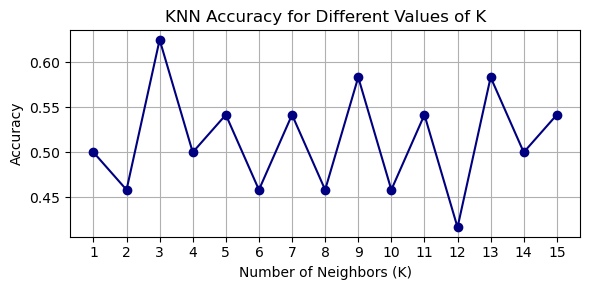

In [83]:
k_values = range(1, 16)  # Try K from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_microwaves, y_train_microwaves)
    preds = knn.predict(X_test_scaled_microwaves)
    acc = accuracy_score(y_test_microwaves, preds)
    accuracies.append(acc)

plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='navy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/3/knn_plot_microwaves.png", dpi=300, bbox_inches='tight')
plt.show()

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_microwaves = KNeighborsClassifier(n_neighbors=3)  
knn_microwaves.fit(X_train_scaled_microwaves, y_train_microwaves)
preds_knn_microwaves = knn_microwaves.predict(X_test_scaled_microwaves)

#have to run numerical features train/test split from above
print("Accuracy:", accuracy_score(y_test_microwaves, preds_knn_microwaves))
print(classification_report(y_test_microwaves, preds_knn_microwaves))

Accuracy: 0.625
              precision    recall  f1-score   support

       False       0.50      0.67      0.57         9
        True       0.75      0.60      0.67        15

    accuracy                           0.62        24
   macro avg       0.62      0.63      0.62        24
weighted avg       0.66      0.62      0.63        24



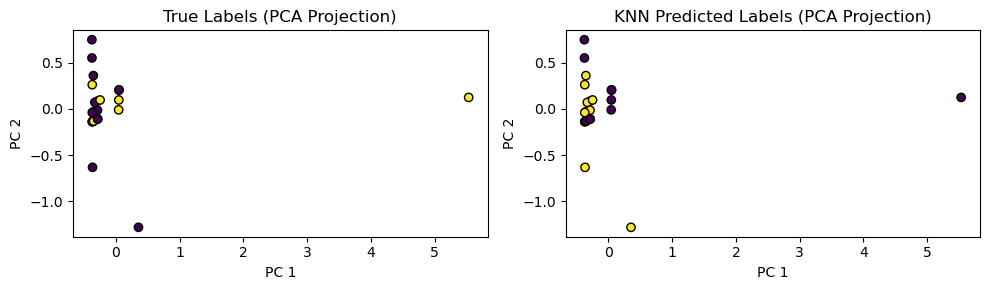

In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fit PCA on test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled_microwaves)

y_true_numeric = pd.factorize(y_test_microwaves.squeeze())[0]
y_pred_numeric = pd.factorize(pd.Series(preds_knn_microwaves).squeeze())[0]

# True labels
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_true_numeric, cmap='viridis', edgecolor='k')
plt.title("True Labels (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_numeric, cmap='viridis', edgecolor='k')
plt.title("KNN Predicted Labels (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.savefig("images/3/knn_pca_microwaves.png", dpi=300, bbox_inches='tight')
plt.show()

### Lego

#### NB

In [86]:
#df_lego.info()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


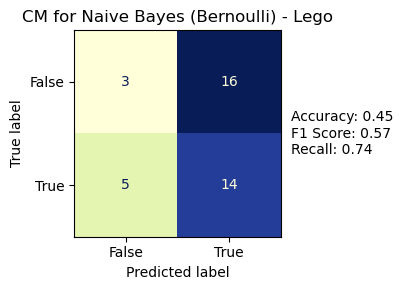

In [87]:
binary_features_lego = ["is_prime", "sponsored", "has_coupon", "top_theme"]
response = ["is_high_price"]

from sklearn.model_selection import train_test_split

X_train_lego, X_test_lego, y_train_lego, y_test_lego = train_test_split(df_lego[binary_features_lego], df_lego[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.naive_bayes import BernoulliNB
classifier_bern_lego = BernoulliNB()
classifier_bern_lego.fit(X_train_lego, y_train_lego)
preds_bern_lego = classifier_bern_lego.predict(X_test_lego)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_lego, preds_bern_lego)
f1 = f1_score(y_test_lego, preds_bern_lego)#, average="weighted")
recall = recall_score(y_test_lego, preds_bern_lego)#, average="weighted")
cm_lego = confusion_matrix(y_test_lego, preds_bern_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=classifier_bern_lego.classes_)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('CM for Naive Bayes (Bernoulli) - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbb_lego.png", dpi=300, bbox_inches='tight')
plt.show()

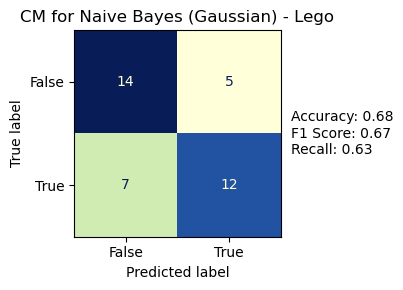

In [88]:
num_features_lego = ["rating", "ratings_total", "recent_sales_num", "discount$", "discount%"]
df_lego[num_features_lego] = df_lego[num_features_lego].fillna(0)

response = "is_high_price"

from sklearn.model_selection import train_test_split
X_train_lego, X_test_lego, y_train_lego, y_test_lego = train_test_split(df_lego[num_features_lego], df_lego[response],
                                                               test_size=0.20, random_state=1216)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_lego = sc.fit_transform(X_train_lego)
X_test_scaled_lego = sc.transform(X_test_lego)

from sklearn.naive_bayes import GaussianNB
classifier_gauss_lego = GaussianNB()
classifier_gauss_lego.fit(X_train_scaled_lego, y_train_lego)
preds_gauss_lego = classifier_gauss_lego.predict(X_test_scaled_lego)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_lego, preds_gauss_lego)
f1 = f1_score(y_test_lego, preds_gauss_lego)#, average="weighted")
recall = recall_score(y_test_lego, preds_gauss_lego)#, average="weighted")
cm_lego = confusion_matrix(y_test_lego, preds_gauss_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=classifier_gauss_lego.classes_)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('CM for Naive Bayes (Gaussian) - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbg_lego.png", dpi=300, bbox_inches='tight')
plt.show()

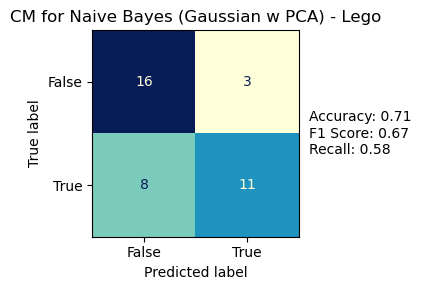

In [89]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

pca = PCA(n_components=5)
X_train_lego_pca = pca.fit_transform(X_train_scaled_lego)
X_test_lego_pca = pca.transform(X_test_scaled_lego)

classifier_gauss = GaussianNB()
classifier_gauss.fit(X_train_lego_pca, y_train_lego)
preds = classifier_gauss.predict(X_test_lego_pca)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test_lego, preds)
f1 = f1_score(y_test_lego, preds)#, average="weighted")
recall = recall_score(y_test_lego, preds)#, average="weighted")
cm_lego = confusion_matrix(y_test_lego, preds)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=classifier_gauss_lego.classes_)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('CM for Naive Bayes (Gaussian w PCA) - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_nbg_pca_lego.png", dpi=300, bbox_inches='tight')
plt.show()

#### KNN

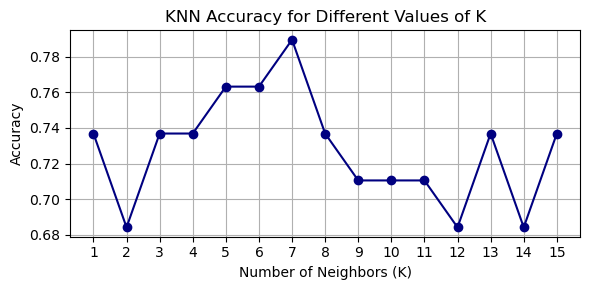

In [90]:
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 16)  # Try K from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_lego, y_train_lego)
    preds = knn.predict(X_test_scaled_lego)
    acc = accuracy_score(y_test_lego, preds)
    accuracies.append(acc)

plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='navy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/3/knn_plot_lego.png", dpi=300, bbox_inches='tight')
plt.show()

Accuracy: 0.7894736842105263
F1 Score: 0.7777777777777778
Recall: 0.7368421052631579
              precision    recall  f1-score   support

       False       0.76      0.84      0.80        19
        True       0.82      0.74      0.78        19

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.79      0.79      0.79        38



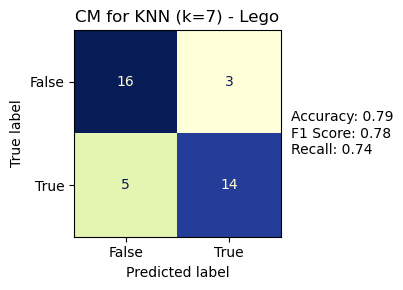

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

knn_lego = KNeighborsClassifier(n_neighbors=7)  
knn_lego.fit(X_train_scaled_lego, y_train_lego)
preds_knn_lego = knn_lego.predict(X_test_scaled_lego)

#have to run numerical features train/test split from above
print("Accuracy:", accuracy_score(y_test_lego, preds_knn_lego))
print("F1 Score:", f1_score(y_test_lego, preds_knn_lego))
print("Recall:", recall_score(y_test_lego, preds_knn_lego))
print(classification_report(y_test_lego, preds_knn_lego))


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test_lego, preds_knn_lego)
f1 = f1_score(y_test_lego, preds_knn_lego)#, average="weighted")
recall = recall_score(y_test_lego, preds_knn_lego)#, average="weighted")
cm_lego = confusion_matrix(y_test_lego, preds_knn_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=knn_lego.classes_)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('CM for KNN (k=7) - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_knn_lego.png", dpi=300, bbox_inches='tight')
plt.show()

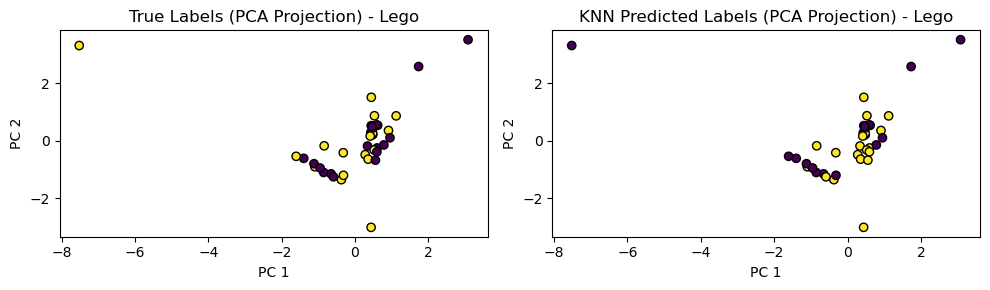

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fit PCA on test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled_lego)

y_true_numeric = pd.factorize(y_test_lego.squeeze())[0]
y_pred_numeric = pd.factorize(pd.Series(preds_knn_lego).squeeze())[0]

# True labels
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_true_numeric, cmap='viridis', edgecolor='k')
plt.title("True Labels (PCA Projection) - Lego")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_numeric, cmap='viridis', edgecolor='k')
plt.title("KNN Predicted Labels (PCA Projection) - Lego")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.savefig("images/3/knn_pca_lego.png", dpi=300, bbox_inches='tight')
plt.show()